Import the Important Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gitconfig
import numpy as np

Read in the CSV File

In [4]:
env_path = gitconfig.env_path
env_path
data_df = pd.read_csv(f'{env_path}/amazon.csv')
data_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Remove symbols and convert the relevant columns to whole numbers.
Convert the percentage values into whole numbers in the discount_percentage column.

In [5]:
data_df['discount_percentage'] = data_df['discount_percentage'].replace({'%': ''}, regex=True).astype(int)
data_df['discounted_price'] = data_df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float).round(0).astype(int)
data_df['actual_price'] = data_df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float).round(0).astype(int)
data_df['rating_count'] = data_df['rating_count'].replace({',': ''}, regex=True).fillna(0).astype(int)
data_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Check and see if theres any duplicate rows to drop

In [6]:
data_df.drop_duplicates(inplace=True)
data_df.shape

(1465, 16)

Convert review_sentiment column into integers. Display positive reviews as 'Yes' equal to 1 and negative reviews as 'No' equal to 0 

In [7]:
positive_keywords = ['good', 'great', 'excellent', 'amazing', 'fantastic', 'satisfied', 'love', 'awesome']
negative_keywords = ['bad', 'poor', 'terrible', 'worst', 'disappointed', 'hate', 'awful']

def classify_review(content):
    content_lower = content.lower()  
    if any(positive_word in content_lower for positive_word in positive_keywords):
        return 1  
    elif any(negative_word in content_lower for negative_word in negative_keywords):
        return 0  
    else:
        return None  

data_df['review_sentiment'] = data_df['review_content'].apply(classify_review)
sentiment_counts = data_df['review_sentiment'].value_counts().sort_index()

 Display the shape of the DataFrame to confirm the removal of rows with NaN or null values

In [8]:
data_df.dropna(inplace=True)
data_df.shape

(1445, 17)

In [9]:
data_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,review_sentiment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,1.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,1.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,1.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,1.0


Drop all columns that don't contain numeric values 

In [10]:
data_df_numeric_only = data_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')
data_df_numeric_only.head()


,discounted_price,actual_price,discount_percentage,rating,rating_count,review_sentiment
0,399,1099,64,4.2,24269,1.0
1,199,349,43,4.0,43994,1.0
2,199,1899,90,3.9,7928,1.0
3,329,699,53,4.2,94363,1.0
4,154,399,61,4.2,16905,1.0


Get data description

In [11]:
data_df_numeric_only.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,review_sentiment
count,1445.000000,1445.000000,1445.000000,1444.000000,1445.000000,1445.000000
mean,3156.129412,5489.391003,47.603460,4.101870,18485.194464,0.993772
std,6985.937800,10932.550869,21.655701,0.283118,42982.998275,0.078701
min,39.000000,39.000000,0.000000,2.000000,0.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1236.000000,1.000000
50%,799.000000,1695.000000,50.000000,4.100000,5292.000000,1.000000
75%,1999.000000,4490.000000,63.000000,4.300000,17415.000000,1.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,1.000000


Get info on DataFrame

In [12]:
data_df_numeric_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1445 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1445 non-null   int64  
 1   actual_price         1445 non-null   int64  
 2   discount_percentage  1445 non-null   int64  
 3   rating               1444 non-null   float64
 4   rating_count         1445 non-null   int64  
 5   review_sentiment     1445 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 79.0 KB


Get a value count on ratings

In [13]:
data_df_numeric_only.value_counts('rating_count').sum

<bound method Series.sum of rating_count
9378     9
18998    8
24269    7
43994    6
32840    5
        ..
3454     1
3482     1
3492     1
3517     1
7140     1
Name: count, Length: 1131, dtype: int64>

In [14]:
data_df_numeric_only.value_counts('rating').sum

<bound method Series.sum of rating
4.1    241
4.2    228
4.3    228
4.0    180
4.4    121
3.9    120
3.8     86
4.5     75
3.7     41
3.6     34
3.5     26
4.6     17
3.3     12
3.4     10
4.7      6
4.8      3
5.0      3
3.1      3
3.0      3
3.2      2
2.8      2
2.6      1
2.9      1
2.0      1
Name: count, dtype: int64>

Get a value count on all products

In [15]:
data_df_numeric_only.value_counts

<bound method DataFrame.value_counts of       discounted_price  actual_price  discount_percentage  rating  \
0                  399          1099                   64     4.2   
1                  199           349                   43     4.0   
2                  199          1899                   90     3.9   
3                  329           699                   53     4.2   
4                  154           399                   61     4.2   
...                ...           ...                  ...     ...   
1460               379           919                   59     4.0   
1461              2280          3045                   25     4.1   
1462              2219          3080                   28     3.6   
1463              1399          1890                   26     4.0   
1464              2863          3690                   22     4.3   

      rating_count  review_sentiment  
0            24269               1.0  
1            43994               1.0  
2             

Data Modeling

In [88]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import requests
import time
from dotenv import load_dotenv
import os
import json
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [18]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.impute import SimpleImputer

Split the dataset into features (X) and target (y)

Split the data into training and testing sets

Create, fit and train for better accuracy using different models

Evaluate the model(s) with predictions

Test the accuracy for the model(s)

Target column in predicting 'Product Recomendations'

Handle missing values for target column

In [38]:
data_df_numeric_only = data_df_numeric_only.dropna()

# convert the rating category column to a number by encoding it
label_encoder = LabelEncoder()
data_df_numeric_only['rating_category'] = label_encoder.fit_transform(data_df_numeric_only['rating_category'])



data_df_numeric_only

,discounted_price,actual_price,discount_percentage,rating,rating_count,review_sentiment,Product_Recommendation,rating_category
0,399,1099,64,4.2,24269,1.0,1,3
1,199,349,43,4.0,43994,1.0,1,2
2,199,1899,90,3.9,7928,1.0,0,2
3,329,699,53,4.2,94363,1.0,1,3
4,154,399,61,4.2,16905,1.0,1,3
...,...,...,...,...,...,...,...,...
1460,379,919,59,4.0,1090,1.0,1,2
1461,2280,3045,25,4.1,4118,1.0,1,3
1462,2219,3080,28,3.6,468,1.0,0,2
1463,1399,1890,26,4.0,8031,1.0,1,2


In [76]:
data_df_numeric_only['rating'] = data_df_numeric_only['rating'].astype(int)
data_df_numeric_only['review_sentiment'] = data_df_numeric_only['review_sentiment'].astype(int)

data_df_numeric_only

,discounted_price,actual_price,discount_percentage,rating,rating_count,review_sentiment,Product_Recommendation,rating_category
0,399,1099,64,4,24269,1,1,3
1,199,349,43,4,43994,1,1,2
2,199,1899,90,3,7928,1,0,2
3,329,699,53,4,94363,1,1,3
4,154,399,61,4,16905,1,1,3
...,...,...,...,...,...,...,...,...
1460,379,919,59,4,1090,1,1,2
1461,2280,3045,25,4,4118,1,1,3
1462,2219,3080,28,3,468,1,0,2
1463,1399,1890,26,4,8031,1,1,2


In [77]:
data_df_numeric_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   discounted_price        1444 non-null   int64
 1   actual_price            1444 non-null   int64
 2   discount_percentage     1444 non-null   int64
 3   rating                  1444 non-null   int64
 4   rating_count            1444 non-null   int64
 5   review_sentiment        1444 non-null   int64
 6   Product_Recommendation  1444 non-null   int64
 7   rating_category         1444 non-null   int64
dtypes: int64(8)
memory usage: 101.5 KB


In [78]:

X = data_df_numeric_only.drop(['rating'], axis=1)
y = data_df_numeric_only['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=13)


In [79]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 361 entries, 475 to 199
Series name: rating
Non-Null Count  Dtype
--------------  -----
361 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [60]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [92]:
models = {
    'LogisticRegression': LogisticRegression(random_state=10),
    'Random Forest': RandomForestClassifier(random_state=10),
    'Gradient Boosting': GradientBoostingClassifier(random_state=10)
}

model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    model_results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_r2_score': train_r2,
        'test_r2_score': test_r2
    }

for name, results in model_results.items():
    print(f"Model: {name}")
    print(f"Training Accuracy: {results['train_accuracy']:.4f}")
    print(f"Testing Accuracy: {results['test_accuracy']:.4f}")
    print(f"Training R² Score: {results['train_r2_score']:.4f}")
    print(f"Testing R² Score: {results['test_r2_score']:.4f}\n")

Model: LogisticRegression
Training Accuracy: 0.7590
Testing Accuracy: 0.7673
Training R² Score: -0.2960
Testing R² Score: -0.2911

Model: Random Forest
Training Accuracy: 1.0000
Testing Accuracy: 0.9889
Training R² Score: 1.0000
Testing R² Score: 0.9445

Model: Gradient Boosting
Training Accuracy: 1.0000
Testing Accuracy: 0.9945
Training R² Score: 1.0000
Testing R² Score: 0.9306



Visualization charts for Product Recommendation by ratings

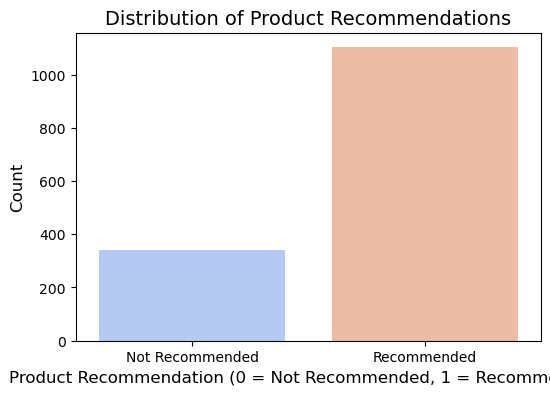

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Product_Recommendation', data=data_df_numeric_only, palette='coolwarm')
plt.title('Distribution of Product Recommendations', fontsize=14)
plt.xlabel('Product Recommendation (0 = Not Recommended, 1 = Recommended)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()

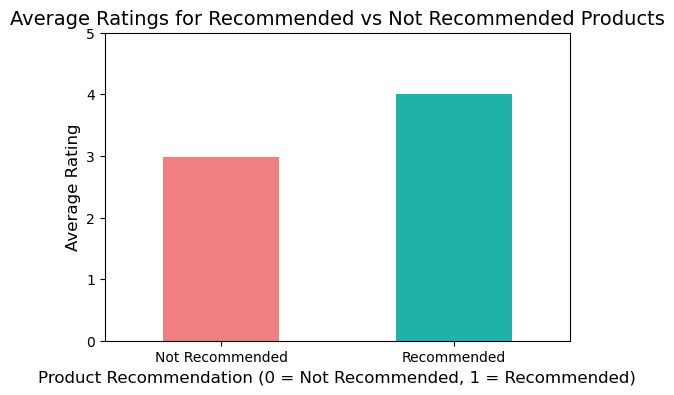

In [82]:
mean_ratings = data_df_numeric_only.groupby('Product_Recommendation')['rating'].mean()

plt.figure(figsize=(6, 4))
mean_ratings.plot(kind='bar', color=['lightcoral', 'lightseagreen'])
plt.title('Average Ratings for Recommended vs Not Recommended Products', fontsize=14)
plt.xlabel('Product Recommendation (0 = Not Recommended, 1 = Recommended)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks([0, 1], ['Not Recommended', 'Recommended'], rotation=0)
plt.ylim(0, 5)
plt.show()

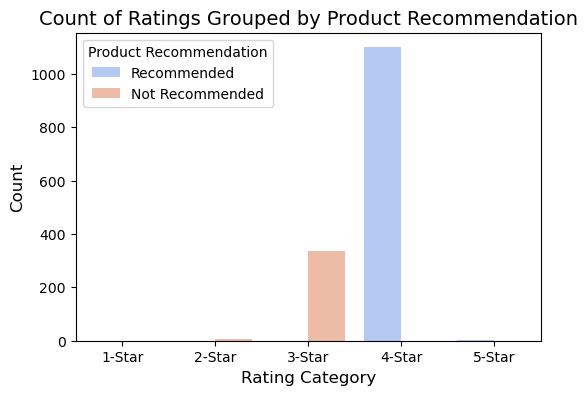

In [87]:
data_df_numeric_only['rating_category'] = pd.cut(data_df_numeric_only['rating'], bins=[0,1, 2, 3, 4, 5], labels=['1-Star', '2-Star', '3-Star', '4-Star','5-Star'])
data_df_numeric_only['Product_Recommendation'] = data_df_numeric_only['Product_Recommendation'].astype(str)
plt.figure(figsize=(6, 4))
sns.countplot(x='rating_category', hue='Product_Recommendation', data=data_df_numeric_only, palette='coolwarm')
plt.title('Count of Ratings Grouped by Product Recommendation', fontsize=14)
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Product Recommendation', loc='upper left', labels=['Recommended', 'Not Recommended'])
plt.show()
